<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/process/pumps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This document is part of the module ["Introduction to Gas Processing using NeqSim in Colab"](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb#scrollTo=_eRtkQnHpL70)

In [1]:
#@title Pumps
#@markdown Introduction to pumps in oil and gas industry
%%capture
!pip install neqsim==2.5.35
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

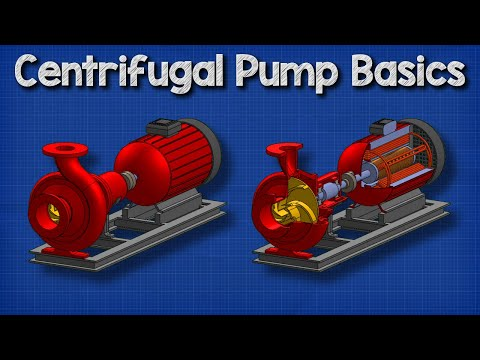

In [2]:
#@title  Pumps in oil and gas industry
#@markdown Introduction to centrifugal pumps
from IPython.display import YouTubeVideo
YouTubeVideo('XpcCUtYzwy0', width=600, height=400)

#Pump calculations uing NeqSim

In [7]:
from neqsim.thermo import fluid
from neqsim.process import clearProcess, stream, runProcess, pump, compressorChart

# Start by creating a fluid in neqsim
fluid1 = fluid("srk")  # create a fluid using the SRK-EoS
fluid1.addComponent("n-nonane", 1.0)

fluid1.setTemperature(28.15, "C")
fluid1.setPressure(1.0, "bara")
fluid1.setTotalFlowRate(135000.0, "kg/hr")
# demonstration of setting up a simple process calculation

clearProcess()
stream1 = stream(fluid1)
pump1 = pump(stream1, 11.0)
runProcess()

print("temperature out of pump ", pump1.getOutStream().getTemperature()-273.15, " °C")
print("pump power ", pump1.getPower()/1e3, " kW")

temperature out of pump  28.339070152323814  °C
pump power  62.1011699633766  kW


# Using pump curves

Pump curves are graphical representations of a pump's performance characteristics and are commonly used in engineering and fluid mechanics to make calculations related to pump selection, operation, and system design. To use pump curves for calculations, follow these steps:

Before using pump curves, you need to gather important information about your system and the pump in question. This includes the desired flow rate (Q), total head (H), fluid properties (density and viscosity), and any other relevant data.
Obtain the Pump Curve:

The manufacturer provides pump curves for each pump model they produce. These curves are typically available in the pump's technical documentation. The two most important curves you'll find on a pump curve chart are:
* Head vs. Flow Rate (H-Q Curve): This curve shows how the pump's head (pressure) varies with the flow rate it produces. It's essential for determining whether the pump can meet your system's requirements.
* Efficiency vs. Flow Rate (η-Q Curve): This curve displays the pump's efficiency at different flow rates. It helps you assess the pump's energy efficiency under varying conditions.
Identify the Operating Point:

Determine the desired flow rate (Q) and total head (H) for your system. These values depend on the specific application and are usually based on system requirements and constraints.
Plot the Operating Point:

On the pump curve chart, locate the operating point that corresponds to your desired flow rate and head. This point should fall on the H-Q curve. The intersection of the H-Q curve and your system's head and flow rate is the operating point.

* Pump Head (H): The pressure (head) the pump will generate at the desired flow rate.
* Pump Efficiency (η): The efficiency of the pump at that operating point.
Calculate Power Requirements:

To determine the power required to operate the pump at the specified operating point, use the following formula:

Power (P) = (Flow Rate (Q) × Head (H) × Fluid Density) / (Pump Efficiency)
Check NPSH (Net Positive Suction Head):

Ensure that the available Net Positive Suction Head (NPSH) in your system exceeds the NPSH required by the pump at the operating point. If it doesn't, cavitation may occur, leading to pump damage and reduced performance.
Consider System Curves:

If your system includes pipes, valves, and other components, you may need to create a system curve that accounts for the head losses in these components. The intersection of the system curve and the pump curve will determine the actual operating point.

In [36]:
from jpype.types import *

# Start by creating a fluid in neqsim
fluid1 = fluid("srk")  # create a fluid using the SRK-EoS
fluid1.addComponent("n-nonane", 1.0)


feedC10Stream = stream(fluid1)
feedC10Stream.setFlowRate(30000, "kg/hr")
feedC10Stream.setTemperature(30.0, "C")
feedC10Stream.setPressure(10.0, "bara")
feedC10Stream.run()


pump1 = pump(feedC10Stream)


curveConditions = []
speed = [500]
flow = [[27.1285, 31.0375, 36.2288, 41.4503, 45.2768, 49.7728, 52.0329, 56.0331]]
head = [[ 80.0375, 78.8934, 76.2142, 71.8678, 67.0062, 60.6061, 53.0499, 39.728]]
polyEff = [[77.24, 79.41, 80.73, 80.52, 79.2210931638144, 75.47, 69.60, 58.73]]
pump1.getPumpChart().setCurves(curveConditions, speed, flow, head, polyEff)
pump1.getPumpChart().setHeadUnit("meter")
pump1.setSpeed(500)
pump1.run()

print('pump flow ', pump1.getInStream().getFlowRate('m3/hr'))
print('pump inlet pressure ', pump1.getInStream().getPressure('bara'))
print('pump outlet pressure ', pump1.getOutStream().getPressure('bara'))

print('pump get head ', pump1.getPumpChart().getHead(pump1.getInStream().getFlowRate('m3/hr'), pump1.getSpeed()))


pump flow  41.06395065904293
pump inlet pressure  10.0
pump outlet pressure  17.16504193320151
pump get head  73.06309425952298


Text(0, 0.5, 'Head [m]')

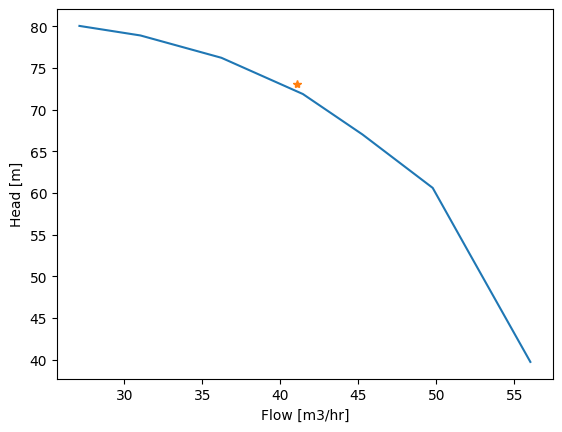

In [46]:
import matplotlib.pyplot as plt
plt.plot(flow[0], head[0])
plt.plot(pump1.getInStream().getFlowRate('m3/hr'), pump1.getPumpChart().getHead(pump1.getInStream().getFlowRate('m3/hr'), pump1.getSpeed()), marker='*')
plt.xlabel('Flow [m3/hr]')
plt.ylabel('Head [m]')